In [28]:
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy
import itertools

import numpy as np
from scipy import linalg
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

from gmm_lbd.gmm import LbdGMM
from gmm_lbd.data_manager import GmmManager, plot_2D_mean_covars
from gmm_lbd.operations import prod, seq, influence_gmm

%matplotlib inline


### We load a dataset of ~150 samples / 5 components (4 motors + time) registered 3 times by demonstration with a right arm of a poppy-torso

In [2]:
manager2 = GmmManager(n_components_range=range(2, 5))
manager2.add_move('records/l_arm_2.record')
manager2.add_move('records/l_arm_3.record')
manager2.add_move('records/l_arm_4.record')
print manager2.datasets['r_arm_z'].shape, manager2.datasets.keys()


(462, 2) [u'r_arm_z', u'r_elbow_y', u'r_shoulder_x', u'r_shoulder_y']


We generate GMM of motors position referenced with the sample number

[(<matplotlib.axes._subplots.AxesSubplot at 0x7f280a142790>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f2809f98e10>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f2809ea2710>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f2809d2fc50>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f2809ccb250>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f2809b42950>)]

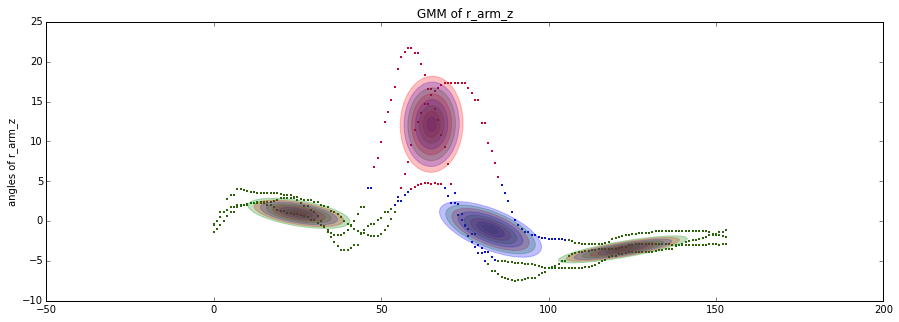

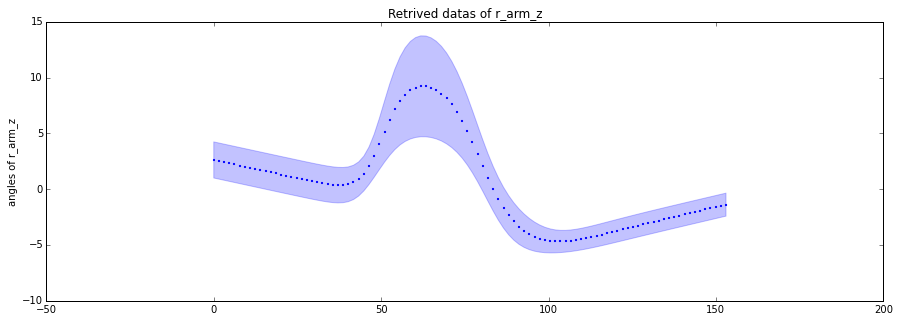

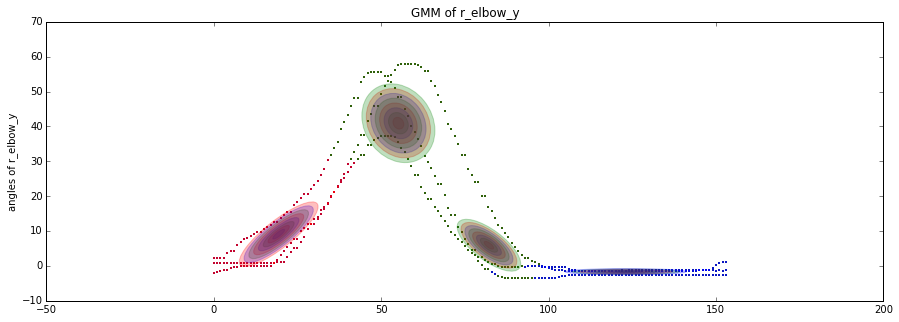

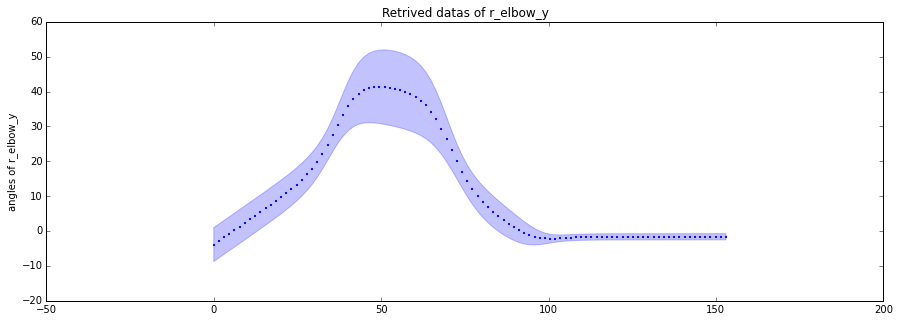

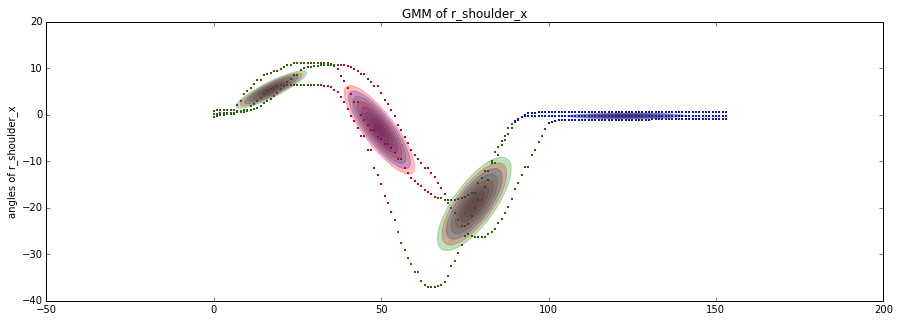

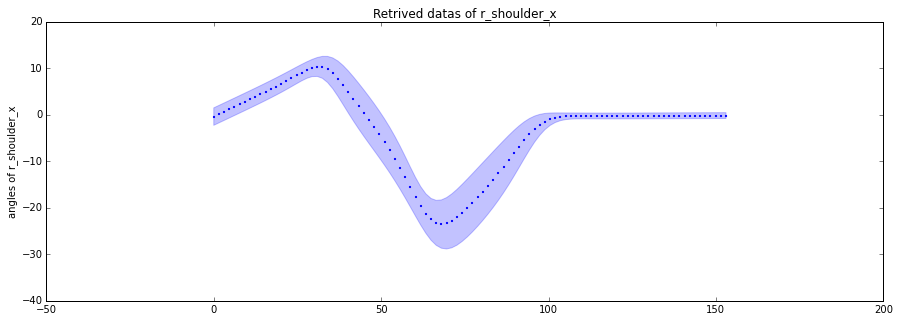

In [3]:
[(manager2.plot_ellipses_and_samples(key), manager2.plot_regression(key)) for key in manager2.datasets.keys()[:-1]]

## The same thing with another dataset:
These movements are too complex and far from each other to be welld represented by the GMM...

In [4]:
manager = GmmManager( n_components_range=range(2, 10))
manager.add_move('records/l_a_1.record')
manager.add_move('records/l_a_3.record')
manager.add_move('records/l_a_4.record')

print manager.datasets['r_arm_z'].shape, manager.datasets.keys()


(459, 2) [u'r_arm_z', u'r_elbow_y', u'r_shoulder_x', u'r_shoulder_y']


[(<matplotlib.axes._subplots.AxesSubplot at 0x7f28099c5690>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f28094db210>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f280946b7d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f280914e050>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f28090db890>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f2808e34450>)]

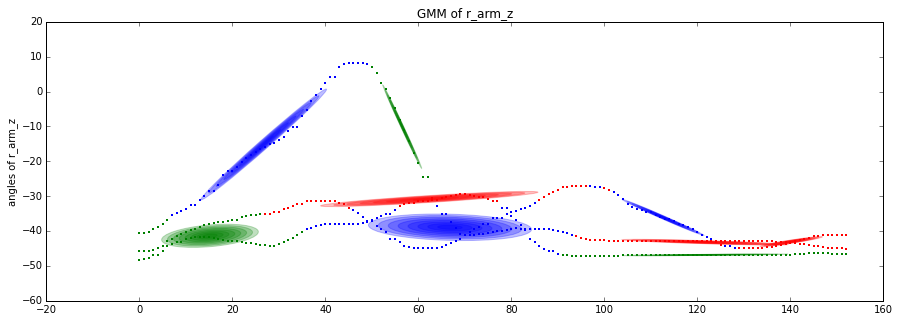

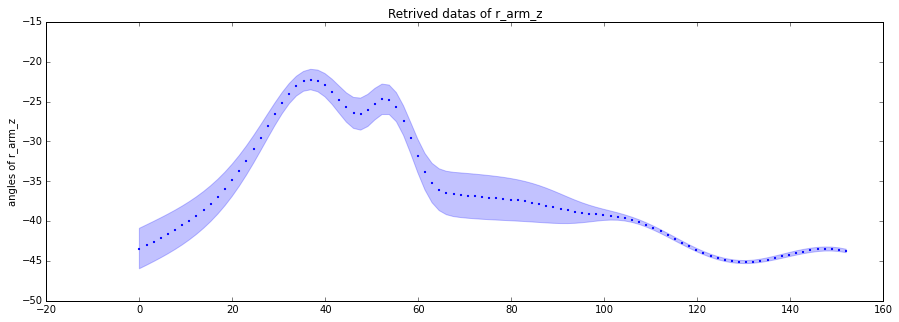

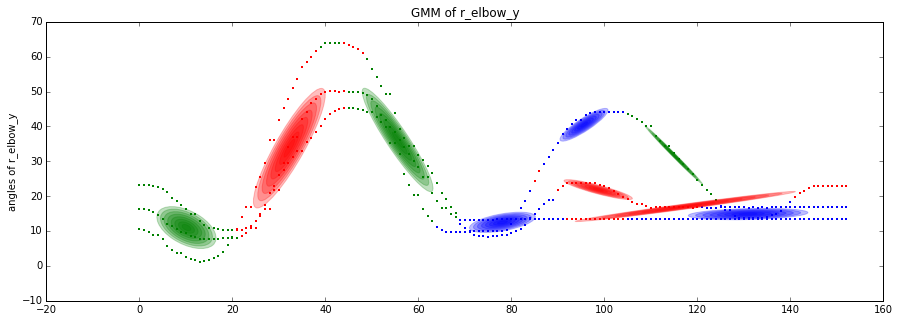

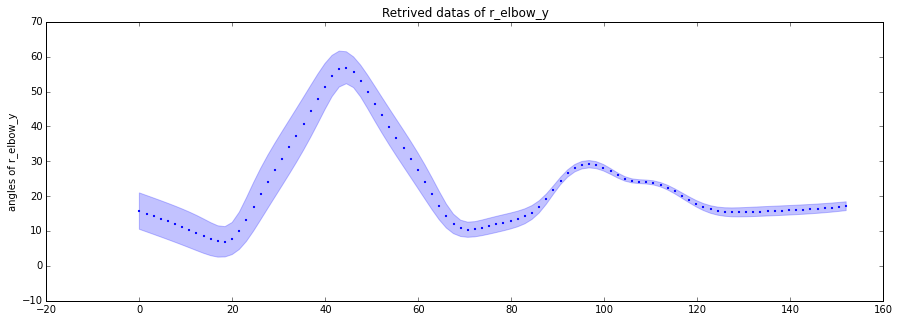

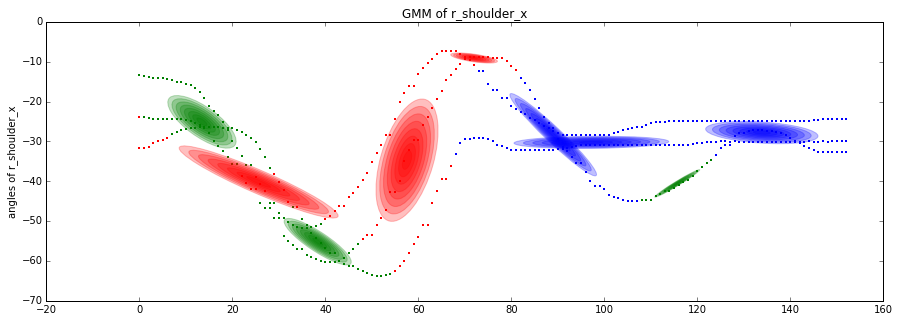

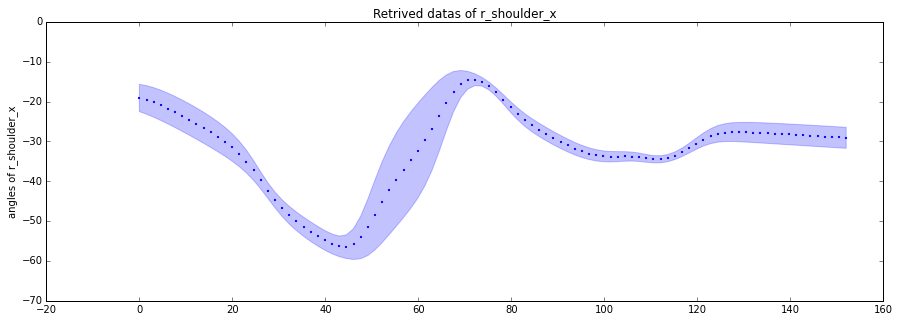

In [5]:
[(manager.plot_ellipses_and_samples(key), manager.plot_regression(key)) for key in manager.datasets.keys()[:-1]]

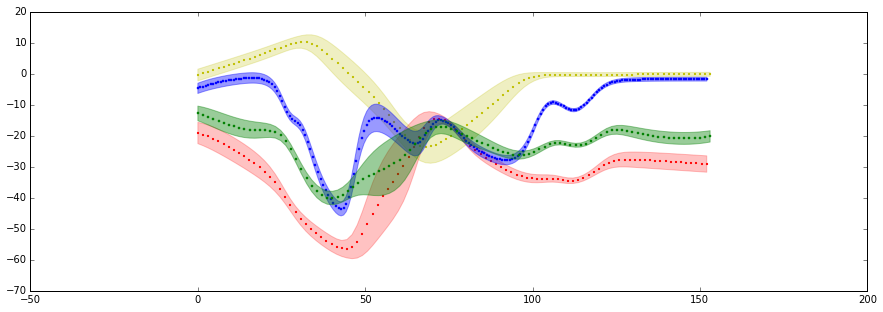

In [70]:
gmm1 = manager.gmms['r_shoulder_x']
gmm2 = manager2.gmms['r_shoulder_x']
gmm3 = manager2.gmms['r_arm_z']
ax = plot_2D_mean_covars(gmm1.regression(), color='r')

plot_2D_mean_covars(gmm2.regression(), ax=ax, color='y')
plot_2D_mean_covars(prod(gmm1, gmm2),ax=ax, size=0.5)
plot_2D_mean_covars(seq(gmm1, gmm2, ver='align').regression(),ax=ax, size=0.5, color='g')




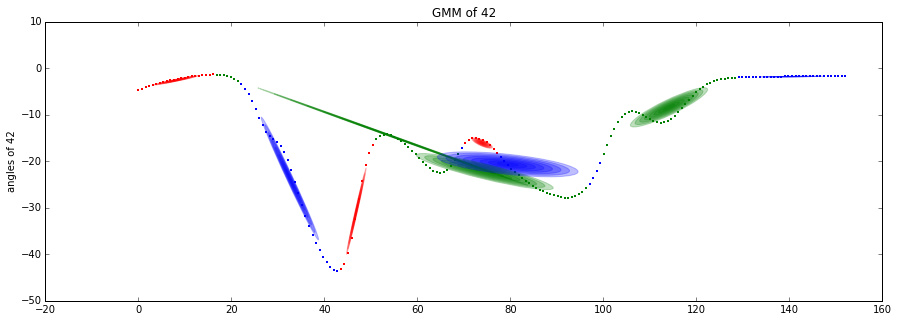

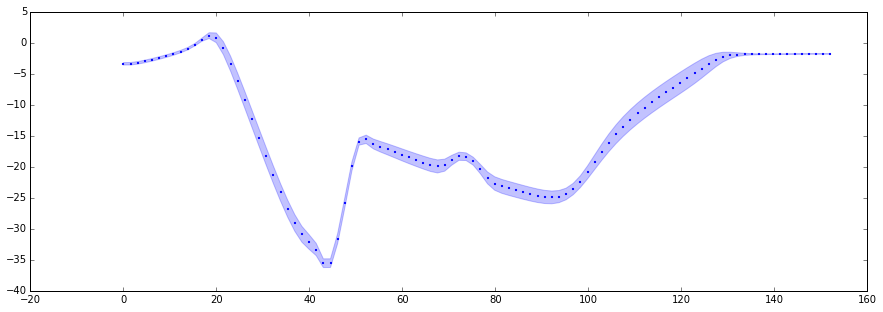

In [68]:
x, means, _ = prod(gmm1, gmm2)
data= np.vstack((x,means[:,0])).T
manager.add_dataset(data,'42')
manager.plot_ellipses_and_samples(dataset_name='42')
plot_2D_mean_covars(manager.gmms['42'].regression())

In [63]:
data= np.hstack((x,means[:,0]))


In [64]:
data.shape

(400,)